In [234]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

In [235]:
input_csv = "../results-yasmin/openssl.csv"
input_sqlite_csv = "../results-yasmin/sqlite-total.csv"
output_pdf = "../results-yasmin/openssl-sqlite.pdf"
baseline = "x86_64,qemu,qemu"
base_arch, base_runtime, base_tag = baseline.split(',')
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,x86_64,openssl.md5-16,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,4.570585e+07,qemu,risotto
1,x86_64,openssl.md5-64,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,8.981923e+07,qemu,risotto
2,x86_64,openssl.md5-256,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.625659e+08,qemu,risotto
3,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.037961e+08,qemu,risotto
4,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.213018e+08,qemu,risotto
...,...,...,...,...,...,...,...,...,...,...
475,aarch64,openssl.rsa4096-verify,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,verify/s,5.182382e+03,native,native
476,aarch64,openssl.rsa7680-sign,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,sign/s,9.811695e+00,native,native
477,aarch64,openssl.rsa7680-verify,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,verify/s,1.512613e+03,native,native
478,aarch64,openssl.rsa15360-sign,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,sign/s,1.628352e+00,native,native


In [236]:
# Select which ciphers to plot
ciphers = [ #'openssl.md5-64', 'openssl.md5-256',
            'openssl.md5-1024', 'openssl.md5-8192',
            #'openssl.rsa512-sign', 'openssl.rsa512-verify',
            'openssl.rsa1024-sign', 'openssl.rsa1024-verify',
            'openssl.rsa2048-sign', 'openssl.rsa2048-verify',
            #'openssl.sha1-64', 'openssl.sha1-256',
            'openssl.sha1-1024', 'openssl.sha1-8192',
            #'openssl.sha256-64', 'openssl.sha256-256',
            'openssl.sha256-1024', 'openssl.sha256-8192'
          ]

df = df.loc[df['bench'].isin(ciphers)]
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
3,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.037961e+08,qemu,risotto
4,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.213018e+08,qemu,risotto
9,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.098029e+08,qemu,risotto
10,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.526287e+08,qemu,risotto
15,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.538397e+08,qemu,risotto
...,...,...,...,...,...,...,...,...,...,...
457,aarch64,openssl.rsa2048-verify,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,verify/s,1.936406e+04,native,native
468,aarch64,openssl.rsa1024-sign,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,sign/s,2.962863e+03,native,native
469,aarch64,openssl.rsa1024-verify,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,verify/s,6.553323e+04,native,native
470,aarch64,openssl.rsa2048-sign,/nix/store/42c9xn9ikr7nbaw76vva6h8yc1vyymv4-op...,none,0.0,1.0,sign/s,4.726727e+02,native,native


In [237]:
# Insert the sqlite results
df_sqlite = pd.read_csv(input_sqlite_csv, sep=';')
df_sqlite = df_sqlite.loc[df_sqlite['bench'] == "micro.sqlite-total-multi"]
df_sqlite['bench'] = "xxxxxxx.sqlite"
# convert to ops/s
df_sqlite['value'] = 269236 / (df_sqlite['value'] / 1000)
df_sqlite['unit'] = "ops/s"

df_sqlite

,arch,bench,cmdline,dataset,threads,unit,value,retval,runtime,tag
33,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,14297.488184,0,qemu,risotto
67,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13773.776027,0,qemu,risotto
101,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13733.727811,0,qemu,risotto
135,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13945.716358,0,qemu,risotto
169,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13851.013479,0,qemu,risotto
203,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13812.641084,0,qemu,risotto
237,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,14262.647666,0,qemu,risotto
271,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13751.966493,0,qemu,risotto
305,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,13809.807140,0,qemu,risotto
339,x86_64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench-x86_64/sql...,none,1.0,ops/s,14436.246649,0,qemu,risotto


In [238]:
df = pd.concat([ df, df_sqlite] , ignore_index=True)
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.037961e+08,qemu,risotto
1,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.213018e+08,qemu,risotto
2,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.098029e+08,qemu,risotto
3,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.526287e+08,qemu,risotto
4,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,2.538397e+08,qemu,risotto
...,...,...,...,...,...,...,...,...,...,...
165,aarch64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,0.0,1.0,ops/s,1.446028e+04,native,native
166,aarch64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,0.0,1.0,ops/s,1.397830e+04,native,native
167,aarch64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,0.0,1.0,ops/s,1.426945e+04,native,native
168,aarch64,xxxxxxx.sqlite,/home/redha/benchmarks/sqlite-bench/sqlite-ben...,none,0.0,1.0,ops/s,1.437459e+04,native,native


In [239]:
base_df = df.loc[df['tag'] == 'qemu']
base_df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
50,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.553836e+08,qemu,qemu
51,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.773650e+08,qemu,qemu
52,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.554169e+08,qemu,qemu
53,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.793445e+08,qemu,qemu
54,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.565052e+08,qemu,qemu
55,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.786976e+08,qemu,qemu
56,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.556377e+08,qemu,qemu
57,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.773486e+08,qemu,qemu
58,x86_64,openssl.md5-1024,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.565196e+08,qemu,qemu
59,x86_64,openssl.md5-8192,/nix/store/q7z0jz5n0890rndbrdappfp5zbmqa7z7-x8...,none,0.0,1.0,B/s,1.787986e+08,qemu,qemu


In [240]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()

In [241]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

/tmp/ipykernel_8001/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_8001/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_8001/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_8001/2931865525.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_df = mean_df.append(tmp_dict, ignore_index=True)
/tmp/ipykernel_8001/2931865525.py:9: FutureWarning: The frame.append method is deprecated and wi

,bench,risotto,native,qemu
0,openssl.md5-1024,2.164095e+08,2.373827e+08,1.558926e+08
1,openssl.md5-8192,2.449511e+08,2.634741e+08,1.783109e+08
2,openssl.rsa1024-sign,2.947261e+03,2.957911e+03,4.540861e+02
3,openssl.rsa1024-verify,6.497618e+04,6.554048e+04,7.501204e+03
4,openssl.rsa2048-sign,4.724925e+02,4.725926e+02,6.779419e+01
5,openssl.rsa2048-verify,1.934354e+04,1.940321e+04,2.726246e+03
6,openssl.sha1-1024,6.547540e+08,6.762087e+08,3.366128e+07
7,openssl.sha1-8192,7.502865e+08,7.545873e+08,3.589026e+07
8,openssl.sha256-1024,6.809025e+08,7.000229e+08,3.199193e+07
9,openssl.sha256-8192,7.846778e+08,7.864837e+08,3.426054e+07


In [242]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        #if row.bench == "sqlite.speedtest1":
         #   norm = base_means[row.bench] / float(row.value)      # speedup
        #else:
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

/tmp/ipykernel_8001/730159105.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_norm = df_norm.append(norm_vals, ignore_index=True)


,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,x86_64,openssl.md5-1024,none,1.0,B/s,203796138.67,qemu,risotto,1.307285,risotto,0.0
1,x86_64,openssl.md5-8192,none,1.0,B/s,221301811.37,qemu,risotto,1.241101,risotto,0.0
2,x86_64,openssl.md5-1024,none,1.0,B/s,209802922.67,qemu,risotto,1.345817,risotto,0.0
3,x86_64,openssl.md5-8192,none,1.0,B/s,252628676.92,qemu,risotto,1.416788,risotto,0.0
4,x86_64,openssl.md5-1024,none,1.0,B/s,253839701.33,qemu,risotto,1.628298,risotto,0.0
...,...,...,...,...,...,...,...,...,...,...,...
110,aarch64,xxxxxxx.sqlite,none,1.0,ops/s,14460.282507,native,native,16.855421,native,0.0
111,aarch64,xxxxxxx.sqlite,none,1.0,ops/s,13978.298115,native,native,16.293603,native,0.0
112,aarch64,xxxxxxx.sqlite,none,1.0,ops/s,14269.450922,native,native,16.632981,native,0.0
113,aarch64,xxxxxxx.sqlite,none,1.0,ops/s,14374.586225,native,native,16.75553,native,0.0


In [243]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

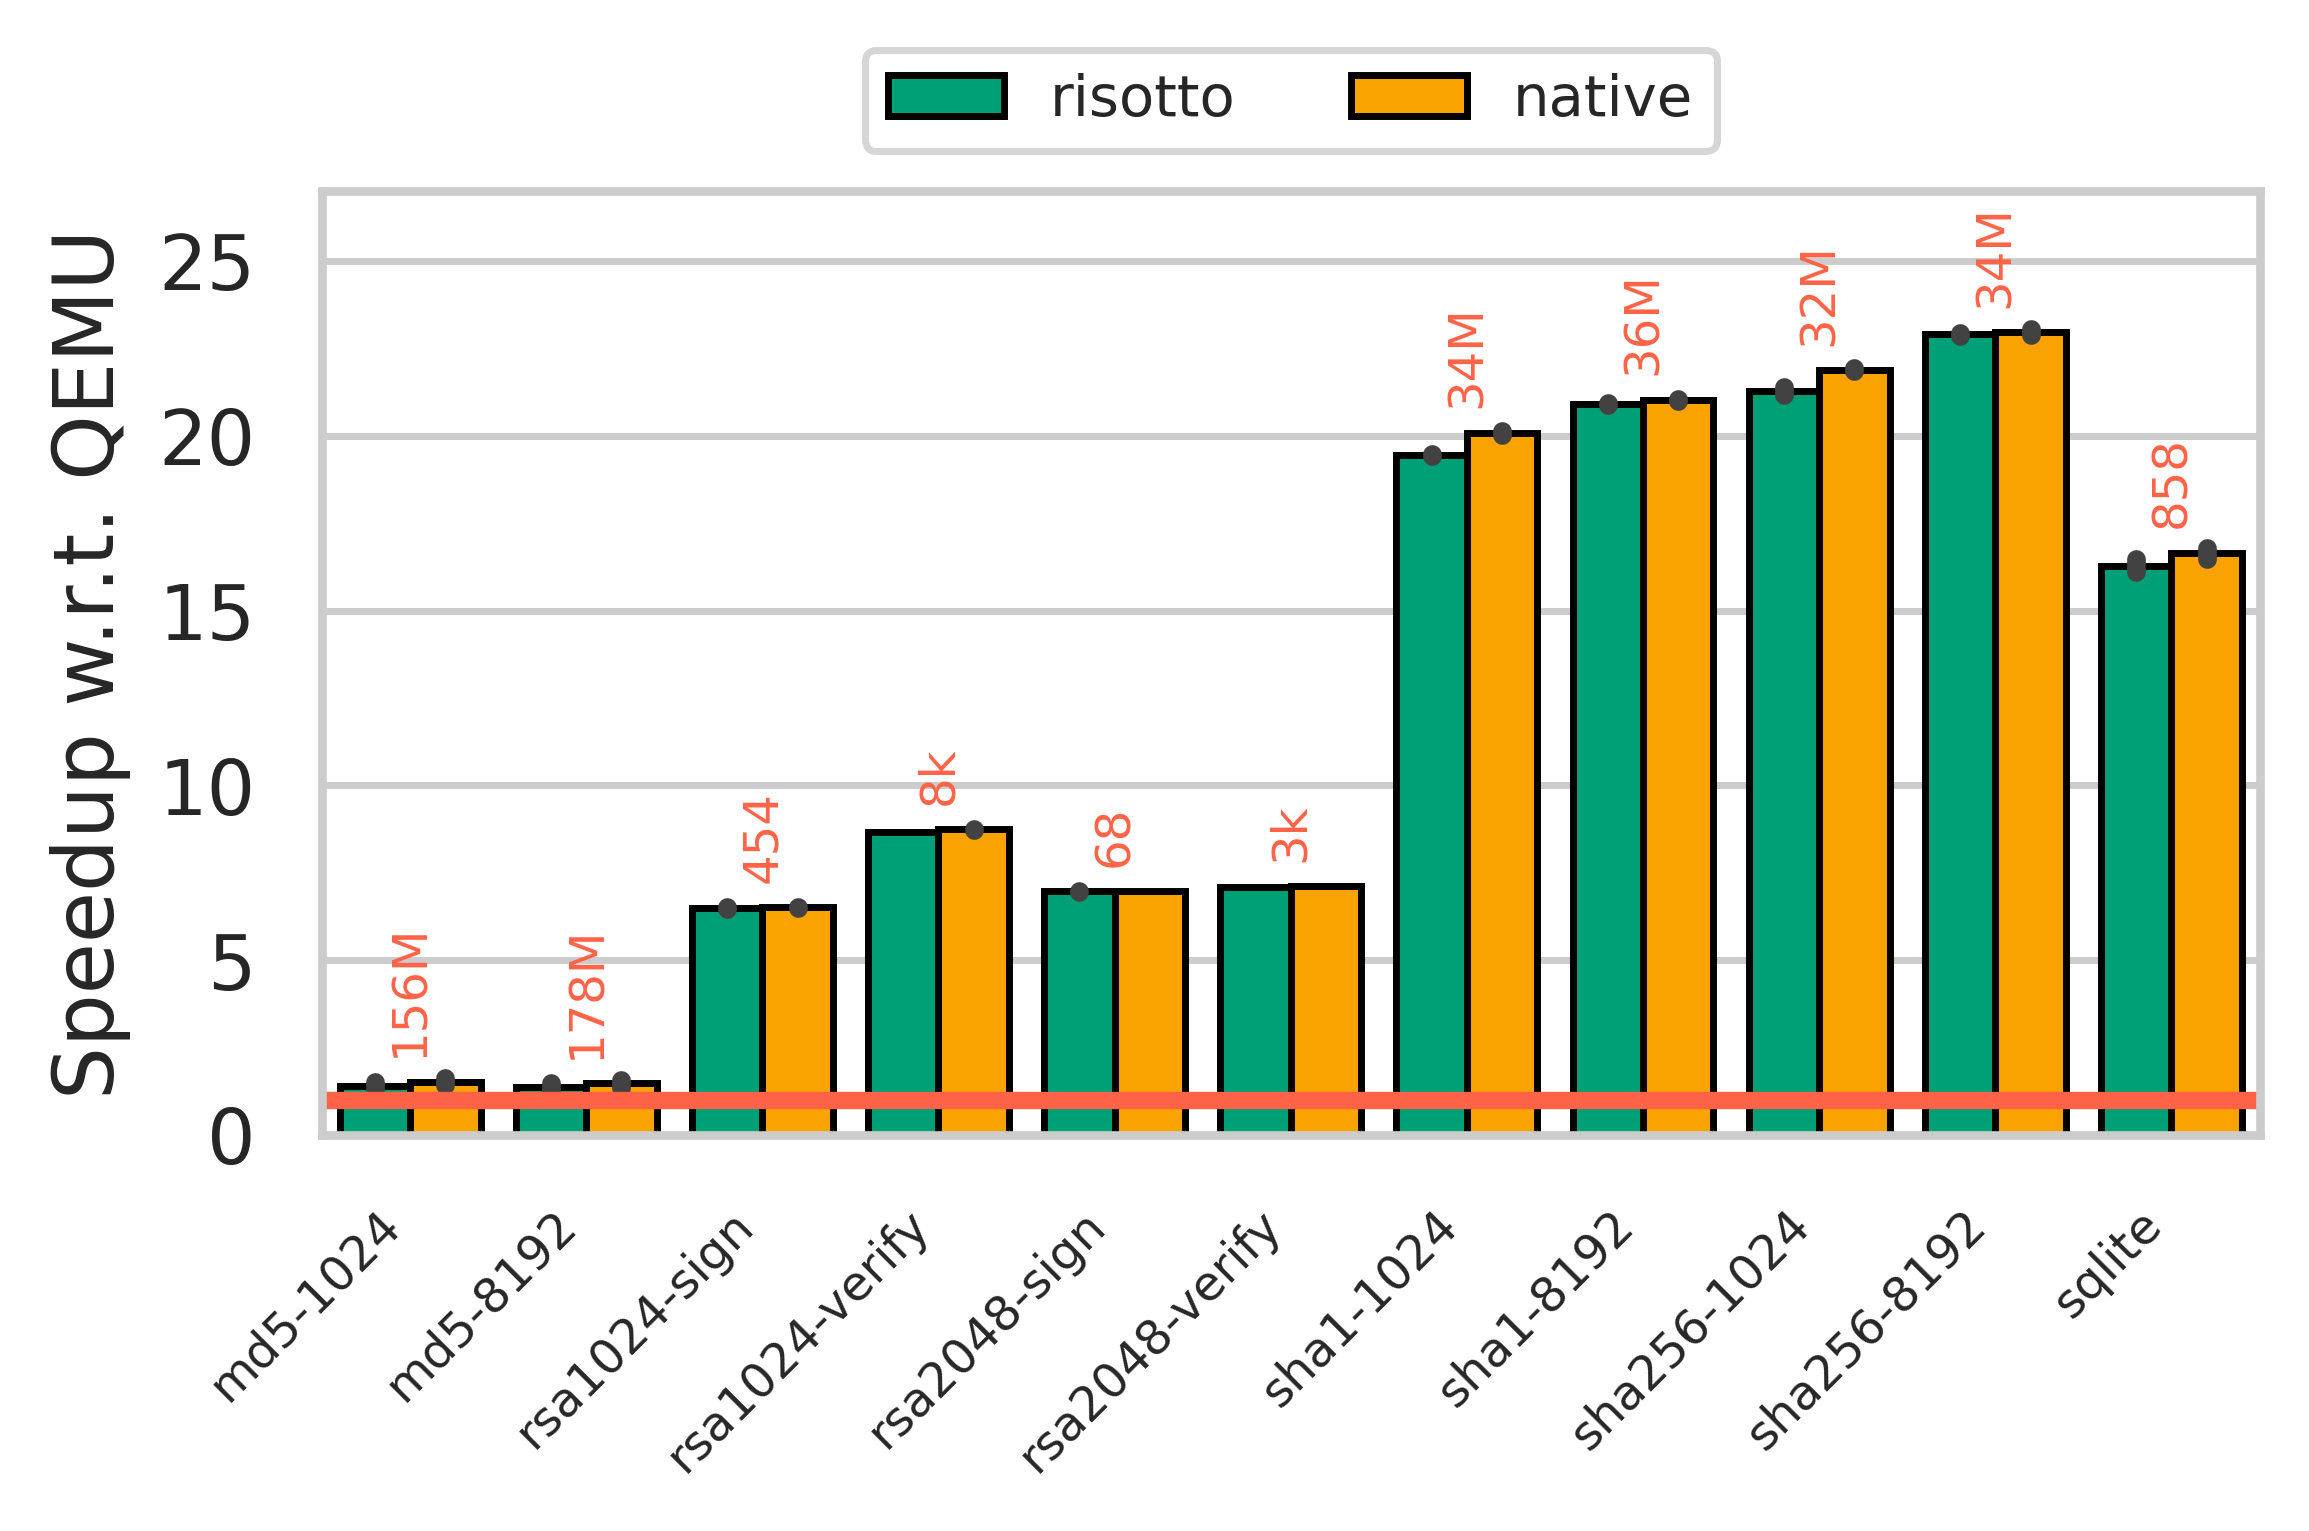

In [244]:
fig = plt.figure(figsize=(5,2.5), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, x='bench', y='norm', hue='label',
                 hue_order=['risotto', 'native'], order=sorted_nicely(base_means))
plt.grid(visible=True, axis='y')
plt.xticks(ticks=range(0, len(set(df_norm['bench']))),
           labels=[ l[8:] for l in sorted_nicely(base_means) ],  # remove openssl. from the x ticks
           rotation=45, ha="right", fontsize='xx-small')
plt.xlabel("")
plt.ylabel("Speedup w.r.t. QEMU")
plt.ylim((0, 27))
plt.axhline(y=1, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted_nicely(set(base_means))):
    if base_means[value] > 1000000:
        v = f"{base_means[value] / 1000000:.0f}M"
    elif base_means[value] > 1000:
        v = f"{base_means[value] / 1000:.0f}k"
    else:
        v = f"{base_means[value]:.0f}"
    tmp = max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]
    plt.text(idx, tmp+1, f"{v}", fontsize='xx-small', color='tomato', rotation=90, ha='center')
    #plt.text(idx, max(tmp+.3, 21), f"{v}", fontsize='xx-small', color='tomato', rotation=45, ha='center')
#plt.vlines(range(0, len(set(base_means))), ymin=0, ymax=20.8, linestyle='dashed', colors='grey', linewidth=.5, zorder=0)

# Set color + hatch
style = {
    'fill': [ True, True ],
    'color': [ palette['bluish green'], palette['orange'] ],
    'hatch': [ '', '', ''],
    'edgecolor': [ 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / int(len(base_means)))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), borderaxespad=0, ncol=2, fontsize='x-small')

In [245]:
fig.savefig(output_pdf, dpi=500, bbox_inches='tight')

In [246]:
for i in sorted_nicely(base_means):
    print(f"{i:25}: {base_means[i]:>20.1f}")

openssl.md5-1024         :          155892624.0
openssl.md5-8192         :          178310848.0
openssl.rsa1024-sign     :                454.1
openssl.rsa1024-verify   :               7501.2
openssl.rsa2048-sign     :                 67.8
openssl.rsa2048-verify   :               2726.2
openssl.sha1-1024        :           33661272.0
openssl.sha1-8192        :           35890256.0
openssl.sha256-1024      :           31991926.0
openssl.sha256-8192      :           34260544.0
xxxxxxx.sqlite           :                857.9


In [247]:
print(value)
max(mean_df.loc[mean_df['bench'] == value].values[0][1:]) / base_means[value]

xxxxxxx.sqlite


16.65593143674735

In [248]:
mean_df['risotto-speedup'] = mean_df['risotto'] / mean_df['qemu']
mean_df

,bench,risotto,native,qemu,risotto-speedup
0,openssl.md5-1024,2.164095e+08,2.373827e+08,1.558926e+08,1.388196
1,openssl.md5-8192,2.449511e+08,2.634741e+08,1.783109e+08,1.373731
2,openssl.rsa1024-sign,2.947261e+03,2.957911e+03,4.540861e+02,6.490533
3,openssl.rsa1024-verify,6.497618e+04,6.554048e+04,7.501204e+03,8.662099
4,openssl.rsa2048-sign,4.724925e+02,4.725926e+02,6.779419e+01,6.969513
5,openssl.rsa2048-verify,1.934354e+04,1.940321e+04,2.726246e+03,7.095303
6,openssl.sha1-1024,6.547540e+08,6.762087e+08,3.366128e+07,19.451253
7,openssl.sha1-8192,7.502865e+08,7.545873e+08,3.589026e+07,20.905020
8,openssl.sha256-1024,6.809025e+08,7.000229e+08,3.199193e+07,21.283572
9,openssl.sha256-8192,7.846778e+08,7.864837e+08,3.426054e+07,22.903250
